In [5]:
'''
KerasBlogVisualizeConvnetLayersCholletFast80percntConvnetDLlayers
 
 Visualize KerasBlogCholletFast80percntConvnetDLlayers model and layers!
'''

from keras.models import load_model

#train_data_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/train'
#validation_data_dir = 'data/validation'
#validation_data_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/validation'

# load the model I used in KerasBlogCholletFast80percntConvnetDLlayers:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 150, 150

#train_data_dir = 'data/train'
train_data_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/train'
#validation_data_dir = 'data/validation'
validation_data_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/validation'
nb_train_samples = 2000
nb_validation_samples = 800  # actually have 1000, but match
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)
    
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#keras_blog_model = load_model('keras_blog_quick80percent.h5') # didn't save the model in keras_blog_quick80. Saved only weights.
model.load_weights('/home/sbradley/tensorflow/mlenv/chollet_book/keras_blog_quick80percentWeights.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
activation_16 (Activation)   (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_17 (Activation)   (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        18496     
__________

In [45]:
import os, shutil

#test_image_file = 'cat.1700.jpg'
test_image_file = 'dog.1547.jpg'
test_cat_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/test/cats'
test_dog_dir = '/home/sbradley/tensorflow/mlenv/chollet_book/dogs_vs_cats/test/dogs'
img_path = os.path.join(test_dog_dir, test_image_file)

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)

# creates a tensor with an additional 0th axis (x-axis) 
# array( [img_tensor] ) -> array( [[img_tensor]] )
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)



(1, 150, 150, 3)


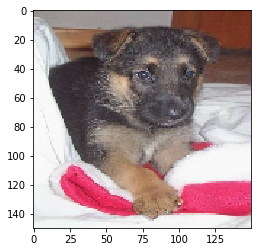

In [46]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

(1, 148, 148, 32)


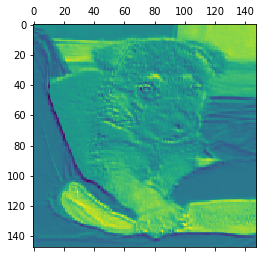

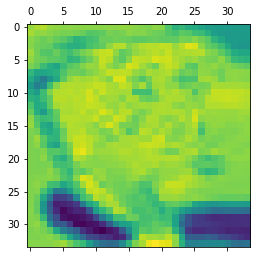

In [47]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]] 

# activation_model looks like it will be a list of activaton ouputs for each layer?
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)
first_layers_activation = activations[0]
print(first_layers_activation.shape)
plt.matshow(first_layers_activation[0,:,:,5], cmap='viridis')

plt.matshow(activations[6][0,:,:,5], cmap='viridis')

/home/sbradley/tensorflow/mlenv/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


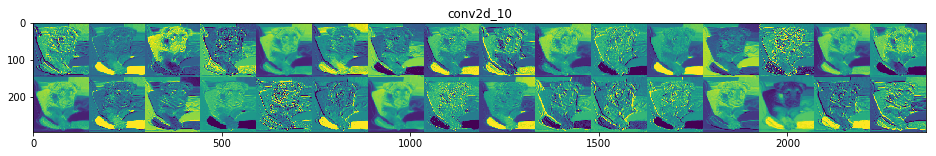

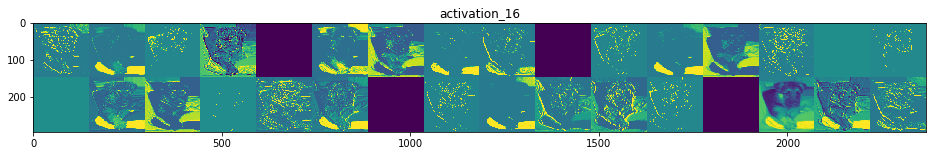

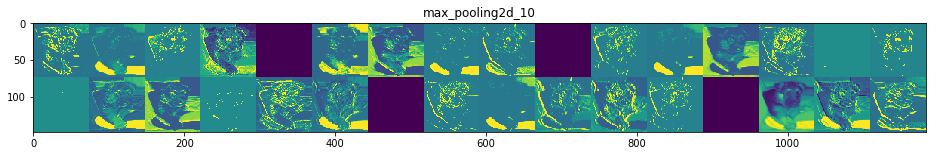

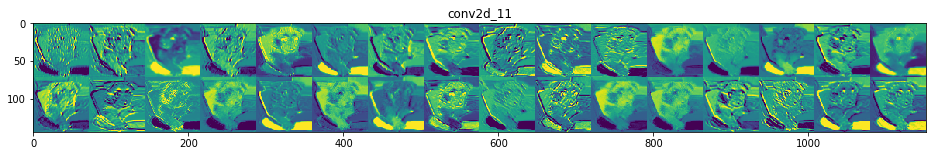

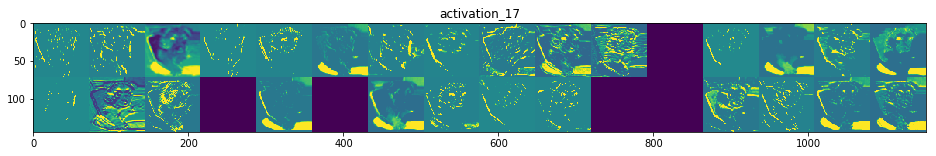

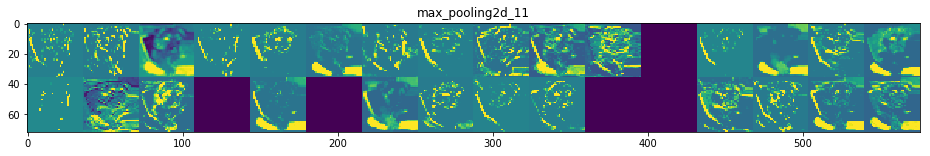

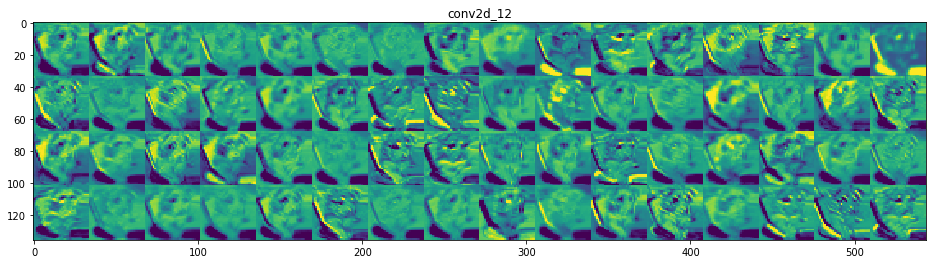

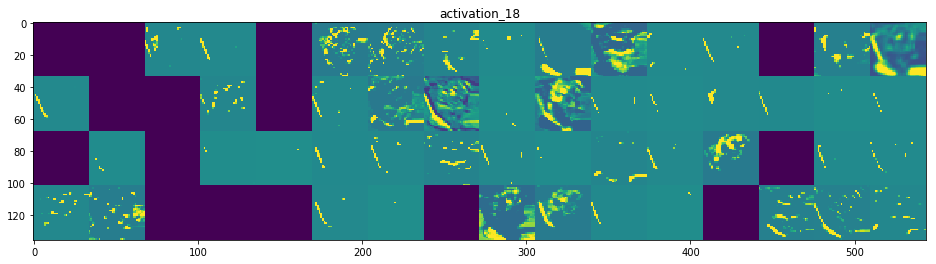

In [48]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    
    size  = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size *n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                            :,:, col*images_per_row +row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
            
    scale = 1. /size
    plt.figure(figsize=(scale*display_grid.shape[1],
                                scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect= 'auto', cmap= 'viridis')
    